# TÜBİTAK 2204-D Lise Öğrencileri İklim Değişikliği Araştırma Projeleri Yarışması 2022
# Kuraklık Tespitine Yapay Zeka ile Bakış: Konya Kapalı Havzası Kuraklık Tahmini
Çalışmamızın kodları bu sayfada mevcuttur.​Bu sayfada;​

* Havza koordinatlarına göre kırpılmış uydu görüntülerinden NDVI görüntüsü elde etme ve bu görüntülerin kaydedilmesini,
* NDVI görüntülerinden ortalama, standart sapma, varyans NDVI değerleri ve NDVI değerlerine ait piksellerin kategorikleştirilmesini,
* Bu değerlerin csv dosyası olarak kaydedilmesini göreceksiniz.

# NDVI (Normalized Differance Vegetation Index)
NDVI HAKKINDA BİLGİLENDİRMELER KOY :)))))))

VARYANS VE STANDART SAPMA ARASINDAKİ FARKA BAK VE DÜZELT

# Kütüphaneler
earthpy ve rioxarray kütüphaneleri Kaggle'da yüklü olmadığı için ortamımıza yüklememiz gerekmektedir.

In [1]:
!pip install earthpy
!pip install rioxarray

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 KB 568.6 kB/s eta 0:00:00
  Installing build dependencies ... - \ | / - \ done
  Getting requirements to build wheel ... - \ | / - done
  Preparing metadata (pyproject.toml) ... - \ | / - done
  Created wheel for rioxarray: filename=rioxarray-0.9.1-py3-none-any.whl size=54609 sha256=be69ac7951fd77af4ac7a4166cf671caa50c363c3ec21cec6d2afd2681a361dd
  Stored in directory: /root/.cache/pip/wheels/07/da/9e/1cc57b2e7a29a206893db83e984a341e2e94378263e0798229
Successfully built rioxarray


In [2]:
import os
from copy import copy
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import pandas as pd
import rioxarray as rxr
import rasterio as rio
import geopandas as gpd
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


# Havza Görüntüleri İçin NDVI Hesaplaması
İlk önce örnek görüntüde NDVI hesaplayacağız. Bu şekilde detaylıca inceleyeceğiz. Örnek görüntü olarak 2016 birleştirilmiş band 4 ve band 5 havza görüntülerini kullanacağız.

In [3]:
"""havza_red_raster = rio.open("../input/2204-d-birle-tirme-l89/Band4/Havza_2016_B4.TIF")
havza_red = havza_red_raster.read(1).astype("float64") # Band4 Görüntü (Red)

havza_nir_raster = rio.open("../input/2204-d-birle-tirme-l89/Band5/Havza_2016_B5.TIF")
havza_nir = havza_nir_raster.read(1).astype("float64") # Band5 Görüntü (NIR)
#masked True yapılarak, nan değerler maskelendi
#squeeze() metodu ile dizi 2 boyutlu hale geldi"""

'havza_red_raster = rio.open("../input/2204-d-birle-tirme-l89/Band4/Havza_2016_B4.TIF")\nhavza_red = havza_red_raster.read(1).astype("float64") # Band4 Görüntü (Red)\n\nhavza_nir_raster = rio.open("../input/2204-d-birle-tirme-l89/Band5/Havza_2016_B5.TIF")\nhavza_nir = havza_nir_raster.read(1).astype("float64") # Band5 Görüntü (NIR)\n#masked True yapılarak, nan değerler maskelendi\n#squeeze() metodu ile dizi 2 boyutlu hale geldi'

In [4]:
"""havza_red"""

'havza_red'

In [5]:
#havza_ndvi = es.normalized_diff(havza_nir, havza_red) # ndvi hesaplandı (nir - red) / (nir + red)
#ep.plot_bands(havza_ndvi, cmap = 'PiYG', scale = False,
#              vmin = -1, vmax = 1, title = "Havza 2016 Örnek NDVI Görüntüsü")
#plt.show()

In [6]:
#ep.plot_bands(havza_ndvi, cmap='RdYlGn', scale=False,
#              vmin=-1, vmax=1, title= "Havza 2016 Örnek NDVI Görüntüsü")
#plt.show()

In [7]:
#ep.hist(havza_ndvi, figsize=(12, 6),
#        title=["Örnek Görüntüde Pixellere Göre NDVI Dağılımı"])

#plt.show()

Bu histogram ile beraber piksellerin ndvi değerlerini görebiliyoruz. Genellikle 0.0 - 0.2 aralığında olduğu görülmekte.

Şimdi de bu NDVI değerlerini kategorikleştirelim.

In [8]:
#ndvi_class_bins = [-np.inf, 0, 0.2, 0.4, 0.6, 0.8 ,np.inf]
#ndvi_landsat_class = np.digitize(havza_ndvi, ndvi_class_bins)

# Apply the nodata mask to the newly classified NDVI data
#ndvi_landsat_class = np.ma.masked_where(
#    np.ma.getmask(havza_ndvi), ndvi_landsat_class)
#np.unique(ndvi_landsat_class)

In [9]:
#nbr_colors = ["tab:blue", "y", "yellowgreen", "g","forestgreen", "darkgreen"]
#nbr_cmap = ListedColormap(nbr_colors)

#ndvi_cat_names = ["<0.0",
#    "0.0 - 0.2",
#    "0.2 - 0.4",
#    "0.4 - 0.6",
#    "0.6 - 0.8",
#    "0.8 - 1.0"]

#classes = np.unique(ndvi_landsat_class)
#classes = classes.tolist()
# Sondaki none sınıfını silelim
#classes = classes[0:6]

In [10]:
#fig, ax = plt.subplots(figsize=(12, 12))
#im = ax.imshow(ndvi_landsat_class, cmap=nbr_cmap)

#ep.draw_legend(im_ax=im, classes=classes, titles=ndvi_cat_names)
#ax.set_title(
#    "Konya Kapalı Havzası Örnek Sınıflandırılmış NDVI Görüntüsü",
#    fontsize=14)
#ax.set_axis_off()

Haritalandırdığımız kategorilerin piksel sayılarına bakalım.

In [11]:
#comp_class = ndvi_landsat_class.compressed()
#comp_class

In [12]:
"""cat1 = 0
cat2 = 0
cat3 = 0
cat4 = 0
cat5 = 0
cat6 = 0

for piksel in comp_class:
    if piksel == 1:
        cat1+=1
    elif piksel ==2:
        cat2+=1
    elif piksel == 3:
        cat3+=1
    elif piksel == 4:
        cat4+=1
    elif piksel == 5:
        cat5+=1
    elif piksel == 6:
        cat6+=1
    else:
        raise ValueError"""

'cat1 = 0\ncat2 = 0\ncat3 = 0\ncat4 = 0\ncat5 = 0\ncat6 = 0\n\nfor piksel in comp_class:\n    if piksel == 1:\n        cat1+=1\n    elif piksel ==2:\n        cat2+=1\n    elif piksel == 3:\n        cat3+=1\n    elif piksel == 4:\n        cat4+=1\n    elif piksel == 5:\n        cat5+=1\n    elif piksel == 6:\n        cat6+=1\n    else:\n        raise ValueError'

In [13]:
"""toplam = cat1+cat2+cat3+cat4+cat5+cat6
print("cat1", cat1)
print("cat2", cat2)
print("cat3", cat3)
print("cat4", cat4)
print("cat5", cat5)
print("cat6", cat6)
print("toplam", toplam)"""

'toplam = cat1+cat2+cat3+cat4+cat5+cat6\nprint("cat1", cat1)\nprint("cat2", cat2)\nprint("cat3", cat3)\nprint("cat4", cat4)\nprint("cat5", cat5)\nprint("cat6", cat6)\nprint("toplam", toplam)'

Her görüntü için toplam piksel sayısı farklı olabilir. Ama önemli olan piksellerin dağılımıdır. Bu yüzden yüzde hesaplarını kullancağız.

cat1 değişkenini kullanmamıza gerek yok. Çünkü 0'dan küçük değerler için bitki örtüsüyle ilgili bir yorum yapamayız.

In [14]:
"""top = toplam - cat1
cat2y = cat2 / top * 100
cat3y = cat3 / top * 100
cat4y = cat4 / top * 100
cat5y = cat5 / top * 100
cat6y = cat6 / top * 100

print("0.0 - 0.2 değerlerin yüzdesi", cat2y)
print("0.2 - 0.4 değerlerin yüzdesi", cat3y)
print("0.4 - 0.6 değerlerin yüzdesi", cat4y)
print("0.6 - 0.8 değerlerin yüzdesi", cat5y)
print("0.8 - 1.0 değerlerin yüzdesi", cat6y)"""

'top = toplam - cat1\ncat2y = cat2 / top * 100\ncat3y = cat3 / top * 100\ncat4y = cat4 / top * 100\ncat5y = cat5 / top * 100\ncat6y = cat6 / top * 100\n\nprint("0.0 - 0.2 değerlerin yüzdesi", cat2y)\nprint("0.2 - 0.4 değerlerin yüzdesi", cat3y)\nprint("0.4 - 0.6 değerlerin yüzdesi", cat4y)\nprint("0.6 - 0.8 değerlerin yüzdesi", cat5y)\nprint("0.8 - 1.0 değerlerin yüzdesi", cat6y)'

Şimdi de ndvi değerlerin ortalamasını, standart sapmasını ve varyansını görelim.

In [15]:
"""print("Maskesiz ort: " , havza_ndvi.mean())
print("Maskesiz std: ", havza_ndvi.std())
print("Maskesiz var: ", havza_ndvi.var())"""

'print("Maskesiz ort: " , havza_ndvi.mean())\nprint("Maskesiz std: ", havza_ndvi.std())\nprint("Maskesiz var: ", havza_ndvi.var())'

* Ortalamamız 0.13522 civarı çıktı. Bunu doğrulayabiliriz. Çünkü histogramımızda piksellerin 0.0 - 0.2 aralığında yoğunlaştığını görmüştük.

* Standart sapma değerimiz 0.11261 civarı. Yani pikseller genel olarak ortalama değere yakın durmakta.

* Varyans değerimiz 0.01268 civarı. Yani piksellerin NDVI değerleri arasında çok bir uçurum bulunmamakta. Histograma baktığımızda aralarında uçurum farkı bulunan değerlerin az olduğunu görüyoruz.

Fakat elde ettiğimiz bu veriler gerçekçi olmayabilir. Çünkü elde ettiğimiz saf NDVI'yı hemen kullanamayabiliriz. Çünkü bazı NDVI değerleri maskelenmelidir.

--> Histograma baktığımızda 0.0'dan küçük NDVI değerleri gözükmekte. 0'dan küçük NDVI değerleri sulak alanlar veya kentleşmiş alanlar, yerleşim birimleri olabilir. Bu alanlarda bitki örtüsü hakkında yorum yapamayız. Bu yüzden bu değerler maskelenmelidir.

--> Ayrıca değeri 1.0 ve 1.0'den büyük pikselleri de maskelemeliyiz. Çünkü bu değerler bulutlanmadan ötürü NDVI formülünde 1.0 olarak çıkar. Kısacası piksellerin olduğu yerde bulut vardır ve bu yüzden bu alanlarda da bitki örtüsü hakkında yorum yapamayız.

In [16]:
"""masked_havza_ndvi = copy(havza_ndvi)
masked_havza_ndvi[havza_ndvi<0.0] = np.nan
masked_havza_ndvi[havza_ndvi>=1.0] = np.nan
ep.plot_bands(masked_havza_ndvi, cmap = "PiYG", 
              vmin=-1, vmax=1, title= "Maskelenmiş Havza 2016 Örnek NDVI Görüntüsü")
plt.show()"""

'masked_havza_ndvi = copy(havza_ndvi)\nmasked_havza_ndvi[havza_ndvi<0.0] = np.nan\nmasked_havza_ndvi[havza_ndvi>=1.0] = np.nan\nep.plot_bands(masked_havza_ndvi, cmap = "PiYG", \n              vmin=-1, vmax=1, title= "Maskelenmiş Havza 2016 Örnek NDVI Görüntüsü")\nplt.show()'

In [17]:
"""ep.hist(masked_havza_ndvi, figsize=(12, 6),
        title=["Maskelenmiş Örnek Görüntüde Pixellere Göre NDVI Dağılımı"])

plt.show()"""

'ep.hist(masked_havza_ndvi, figsize=(12, 6),\n        title=["Maskelenmiş Örnek Görüntüde Pixellere Göre NDVI Dağılımı"])\n\nplt.show()'

Hem görüntü hem de histograma baktığımızda 0'dan küçük ve 1'den büyük NDVI değerine sahip olan piksellerin maskelendiğini görmekteyiz.

In [18]:
"""havza_stack = np.array([masked_havza_ndvi, havza_ndvi])
ep.plot_bands(havza_stack, cmap = "PiYG", 
              cols = 2, vmin=-1, vmax=1, 
              title= ["Maskelenmiş Havza 2016 Örnek NDVI Görüntüsü",
                      "Maskelenmemiş Havza 2016 Örnek NDVI Görüntüsü"])
ep.plot_bands(havza_stack, cmap = "RdYlGn", 
              cols = 2, vmin=-1, vmax=1, 
              title= ["Maskelenmiş Havza 2016 Örnek NDVI Görüntüsü",
                      "Maskelenmemiş Havza 2016 Örnek NDVI Görüntüsü"])
plt.show()"""

'havza_stack = np.array([masked_havza_ndvi, havza_ndvi])\nep.plot_bands(havza_stack, cmap = "PiYG", \n              cols = 2, vmin=-1, vmax=1, \n              title= ["Maskelenmiş Havza 2016 Örnek NDVI Görüntüsü",\n                      "Maskelenmemiş Havza 2016 Örnek NDVI Görüntüsü"])\nep.plot_bands(havza_stack, cmap = "RdYlGn", \n              cols = 2, vmin=-1, vmax=1, \n              title= ["Maskelenmiş Havza 2016 Örnek NDVI Görüntüsü",\n                      "Maskelenmemiş Havza 2016 Örnek NDVI Görüntüsü"])\nplt.show()'

In [19]:
"""print("Maskelenmiş ort: " , np.nanmean(masked_havza_ndvi))
print("Maskelenmiş std: ", np.nanstd(masked_havza_ndvi))
print("Maskelenmiş var: ", np.nanvar(masked_havza_ndvi))"""

'print("Maskelenmiş ort: " , np.nanmean(masked_havza_ndvi))\nprint("Maskelenmiş std: ", np.nanstd(masked_havza_ndvi))\nprint("Maskelenmiş var: ", np.nanvar(masked_havza_ndvi))'

* Yeni ortalama değerimiz 0.1374 civarı. Önceki ortalamamız 0.13105 civarıydı. Yani asıl değerimizde ortalama daha yüksek.

* Yeni standart sapma değerimiz 0.0870 civarı. Önceki değerimiz 0.0935 civarıydı. Yani şimdiki değerimiz ortalama değere biraz daha yakın, bu da piksellerin ortalama değere daha yakın NDVI değerine sahip olduğunu göstermekte.

* Yeni varyans değerimiz 0.0075 civarı. Önceki değerimiz 0.0087 civarıydı. Yani şimdiki değerlerimiz arasındaki uçurum daha da azaldı. 0'dan küçük değerlerin silinmesiyle de varyansın düşük olacağını da tahmin edebilirdik.

# Uydu Görüntülerinin NDVI Hesaplaması
Önceki sayfalarda havza sınırlarına göre kırpılmış görüntüler kullanılacaktır.

In [20]:
def ndvi_map(band4path, band5path):
    year = band4path.split('/')[-1].split('_')[1]
    
    band4_raster = rio.open(band4path)
    band4 = band4_raster.read(1).astype("float64")
    band5_raster = rio.open(band5path)
    band5 = band5_raster.read(1).astype("float64")
    
    ndvi = es.normalized_diff(band5, band4)
    
    ndvi[ndvi<0.0] = np.nan
    ndvi[ndvi>=1.0] = np.nan
    #0'dan küçük ve 1'den büyük değerler maskelendi.
    #Çünkü 0'dan küçük değerler genellikle su birikintileri, göl ve denizleri simgeler.
    #1'e eşit ve büyük değerler de bulutlanmadan dolayı sağlıklı bir değer veremez.
    
    ndvi_outpath = "./Havza_"+year+"_ndvi.tif"
    new_raster = rio.open(ndvi_outpath, 'w', driver='GTiff',
                            height = band4.shape[0], width = band4.shape[1],
                            count=1, dtype="float32",
                            crs=band4_raster.crs,
                            transform=band4_raster.transform)

    new_raster.write(ndvi, 1)
    new_raster.close()

In [21]:
havza_list = []
havzaband4 = os.listdir("../input/2204-d-birle-tirme-l89/Band4")
havzaband5 = os.listdir("../input/2204-d-birle-tirme-l89/Band5")
havzaband4.sort()
havzaband5.sort()
    
for i in range(len(havzaband4)):
    band4path = os.path.join("../input/2204-d-birle-tirme-l89/Band4",havzaband4[i])
    band5path = os.path.join("../input/2204-d-birle-tirme-l89/Band5",havzaband5[i])
    havza_list.append(ndvi_map(band4path, band5path))
    print("İşlem ", i)

İşlem  0
İşlem  1
İşlem  2
İşlem  3
İşlem  4
İşlem  5
İşlem  6
İşlem  7
İşlem  8


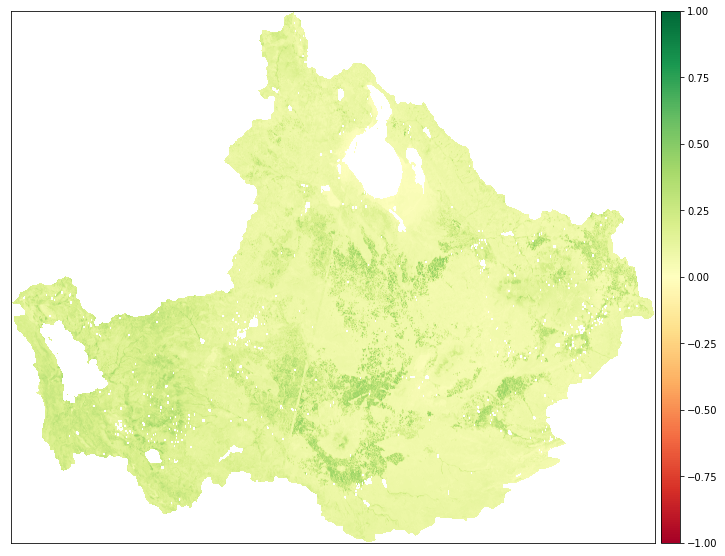

In [22]:
dene = rxr.open_rasterio("./Havza_2014_ndvi.tif")
ep.plot_bands(dene, vmin = -1, vmax = 1, cmap="RdYlGn")
plt.show()